<a href="https://colab.research.google.com/github/MoriartyKang/DL/blob/main/250507_deep_learning_model_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14장 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

!git clone https://github.com/taehojo/data.git
df = pd.read_csv('./data/wine.csv', header=None)
df

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 6.53 MiB/s, done.
Resolving deltas: 100% (9/9), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [ ]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [ ]:
# 학습 데이터셋과 테스트 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4432 - loss: 1.8736 - val_accuracy: 0.8415 - val_loss: 0.4000
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8397 - loss: 0.4289 - val_accuracy: 0.8185 - val_loss: 0.5848
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8350 - loss: 0.5038 - val_accuracy: 0.8423 - val_loss: 0.4712
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8593 - loss: 0.3879 - val_accuracy: 0.8946 - val_loss: 0.3047
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8980 - loss: 0.2783 - val_accuracy: 0.8946 - val_loss: 0.3053
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8963 - loss: 0.2895 - val_accuracy: 0.9162 - val_loss: 0.2812
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9150 - loss: 0.2791 - val_accuracy: 0.9223 - val_loss: 0.2682
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9171 - loss: 0.2571 - val_accuracy: 0.9192 - val_loss: 0.2620


In [ ]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9396 - loss: 0.1749
Test accuracy: 0.9384615421295166


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 모델 구조 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 설정 및 실행

In [ ]:
# 모델 저장 조건 설정
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.7446.keras

Epoch 2: saving model to ./data/model/all/02-0.7446.keras

Epoch 3: saving model to ./data/model/all/03-0.8754.keras

Epoch 4: saving model to ./data/model/all/04-0.7923.keras

Epoch 5: saving model to ./data/model/all/05-0.8323.keras

Epoch 6: saving model to ./data/model/all/06-0.8938.keras

Epoch 7: saving model to ./data/model/all/07-0.9046.keras

Epoch 8: saving model to ./data/model/all/08-0.9185.keras

Epoch 9: saving model to ./data/model/all/09-0.9254.keras

Epoch 10: saving model to ./data/model/all/10-0.9269.keras

Epoch 11: saving model to ./data/model/all/11-0.9269.keras

Epoch 12: saving model to ./data/model/all/12-0.9300.keras

Epoch 13: saving model to ./data/model/all/13-0.9308.keras

Epoch 14: saving model to ./data/model/all/14-0.9315.keras

Epoch 15: saving model to ./data/model/all/15-0.9323.keras

Epoch 16: saving model to ./data/model/all/16-0.9323.keras

Epoch 17: saving model to ./data/model/all/17-0.

In [ ]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1514
Test accuracy: 0.9492307901382446


## 3. 그래프로 과적합 확인하기

In [ ]:
# 그래프 확인을 위한 긴 학습
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [ ]:
hist_df=pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.945343,0.140615,0.953077,0.144673
1,0.945343,0.139123,0.953846,0.141417
2,0.947909,0.136535,0.950000,0.143371
3,0.946882,0.137479,0.953077,0.138449
4,0.945599,0.136591,0.953846,0.138028
...,...,...,...,...
1995,0.994611,0.025121,0.991538,0.031286
1996,0.993072,0.025639,0.990769,0.029300
1997,0.993328,0.025978,0.993846,0.029844
1998,0.993585,0.025000,0.990769,0.032421


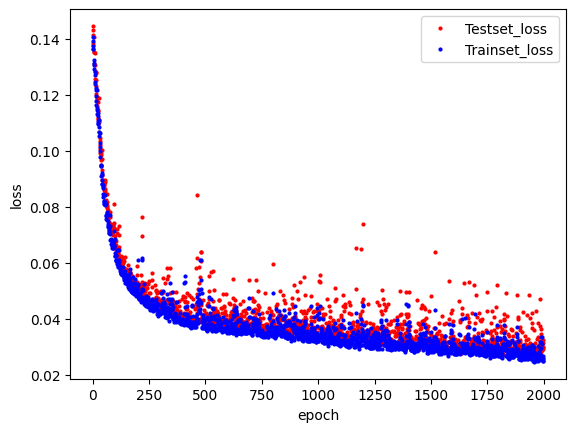

In [ ]:
# 테스트 데이터셋 오차 저장
y_vloss=hist_df['val_loss']

# 학습셋 데이터셋 오차 저장
y_loss=hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

### 학습의 자동 중단 및 최적화 모델 저장

In [ ]:
# 학습이 언제 자동 중단될지 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델 저장 경로
modelpath="./data/model/Ch14-4-bestmodel.keras"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])


Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9952 - loss: 0.0229 - val_accuracy: 0.9885 - val_loss: 0.0326
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9918 - loss: 0.0306 - val_accuracy: 0.9885 - val_loss: 0.0357
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9903 - loss: 0.0275 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9947 - loss: 0.0226 - val_accuracy: 0.9900 - val_loss: 0.0294
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9906 - loss: 0.0318 - val_accuracy: 0.9900 - val_loss: 0.0384
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9900 - loss: 0.0383 - val_accuracy: 0.9908 - val_loss: 0.0352
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9854 - val_loss: 0.0450
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9897 - loss: 0.0344 - val_accuracy: 0.9900 - v

In [ ]:
# 테스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0933
Test accuracy: 0.9823076725006104
